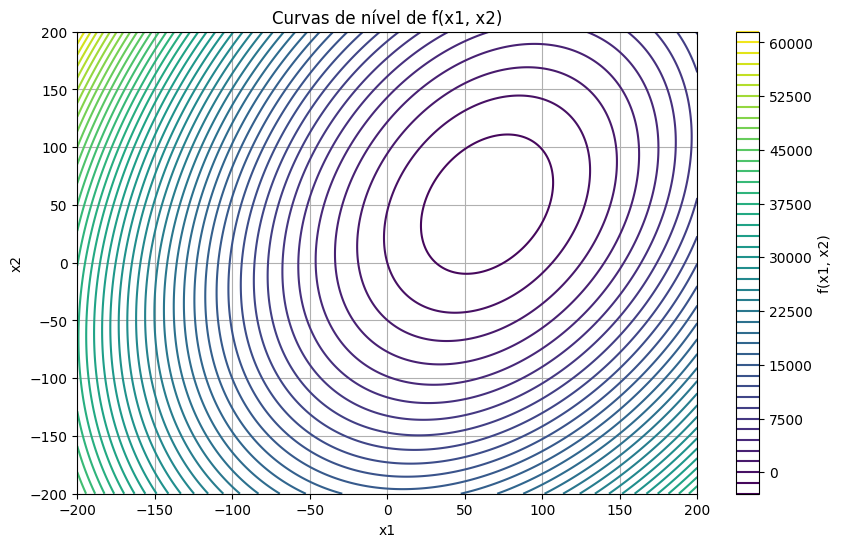

Resultado da otimização:
Ponto ótimo: [64.36329698 50.72022868]
Valor mínimo de f(x1, x2): -2547.723059862131
Número de Iterações: 10
Número de Avaliações da Função: 11


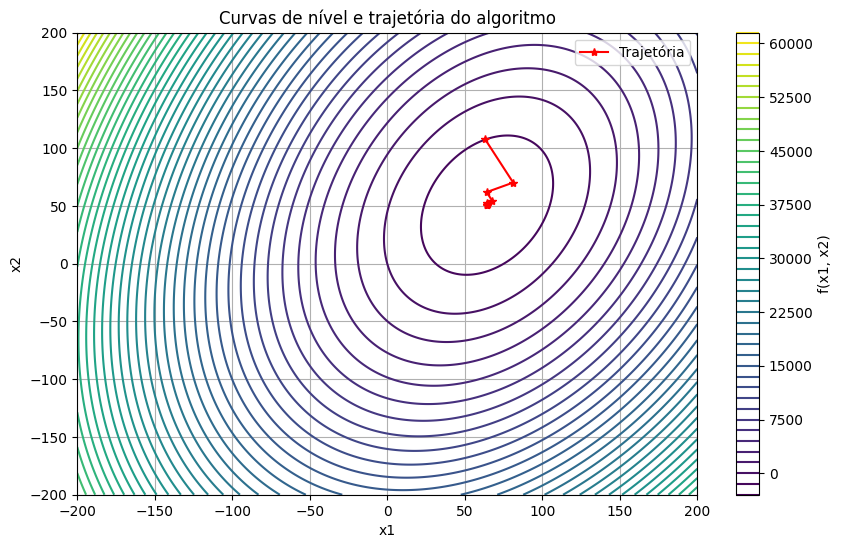

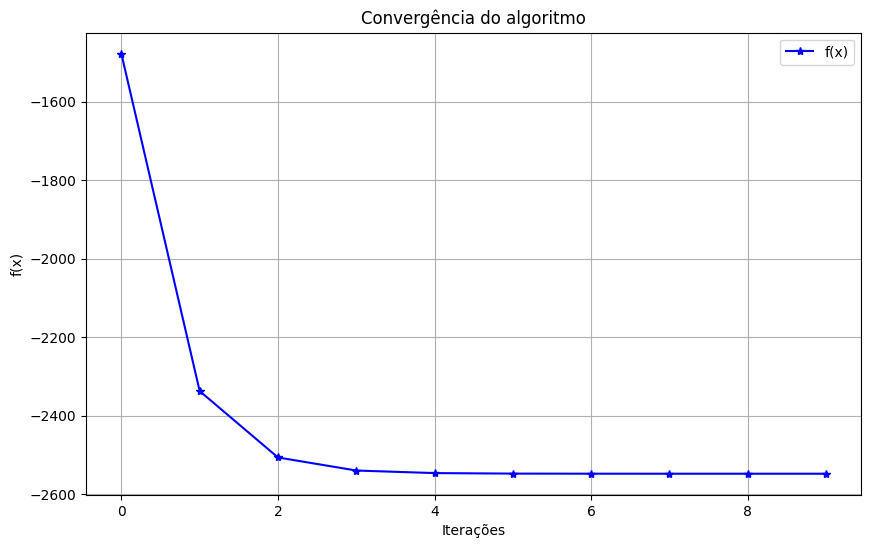

In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Definição da função objetivo f(x1, x2)
def f(X):
    x1, x2 = X
    return (
        0.6382 * x1**2 +
        0.3191 * x2**2 -
        0.2809 * x1 * x2 -
        67.906 * x1 -
        14.29 * x2
    )

# Gradiente da função objetivo 
def grad_f(X):
    x1, x2 = X
    df_dx1 = 2 * 0.6382 * x1 - 0.2809 * x2 - 67.906
    df_dx2 = 2 * 0.3191 * x2 - 0.2809 * x1 - 14.29
    return np.array([df_dx1, df_dx2])

# Geração de malha para curvas de nível
x1 = np.linspace(-200, 200, 500)
x2 = np.linspace(-200, 200, 500)
x1_mesh, x2_mesh = np.meshgrid(x1, x2)
f_mesh = f([x1_mesh, x2_mesh])

# Plotar o gráfico de curva de nível
plt.figure(figsize=(10, 6))
contour = plt.contour(x1_mesh, x2_mesh, f_mesh, levels=50, cmap='viridis')
plt.colorbar(contour, label='f(x1, x2)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Curvas de nível de f(x1, x2)')
plt.grid()
plt.show()

# Parte (b): Otimização
x0 = [150, 150]  # Ponto inicial
trajectory = []
function_values = []

def callback(x):
    trajectory.append(x.tolist())
    function_values.append(f(x))

# Minimização usando o método BFGS
result = minimize(f,
                  x0=x0,
                  method='BFGS',
                  jac=grad_f,
                  callback=callback,
                  tol=1e-6,
                  options={'maxiter': 100})

# Resultados da otimização
print("Resultado da otimização:")
print("Ponto ótimo:", result.x)
print("Valor mínimo de f(x1, x2):", result.fun)
print("Número de Iterações:", result.nit)
print("Número de Avaliações da Função:", result.nfev)

# Plotar a trajetória do algoritmo nas curvas de nível
plt.figure(figsize=(10, 6))
plt.contour(x1_mesh, x2_mesh, f_mesh, levels=50, cmap='viridis')
trajectory = np.array(trajectory)
plt.plot(trajectory[:, 0], trajectory[:, 1], 'r*-', label='Trajetória')
plt.colorbar(label='f(x1, x2)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Curvas de nível e trajetória do algoritmo')
plt.legend()
plt.grid()
plt.show()

# Plotar a convergência do algoritmo
plt.figure(figsize=(10, 6))
plt.plot(function_values, 'b*-', label='f(x)')
plt.title('Convergência do algoritmo')
plt.xlabel('Iterações')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()


Resultado do Método de Newton:
Ponto ótimo: [64.36329702 50.72022898]
Valor mínimo de f(x1, x2): -2547.7230598621304


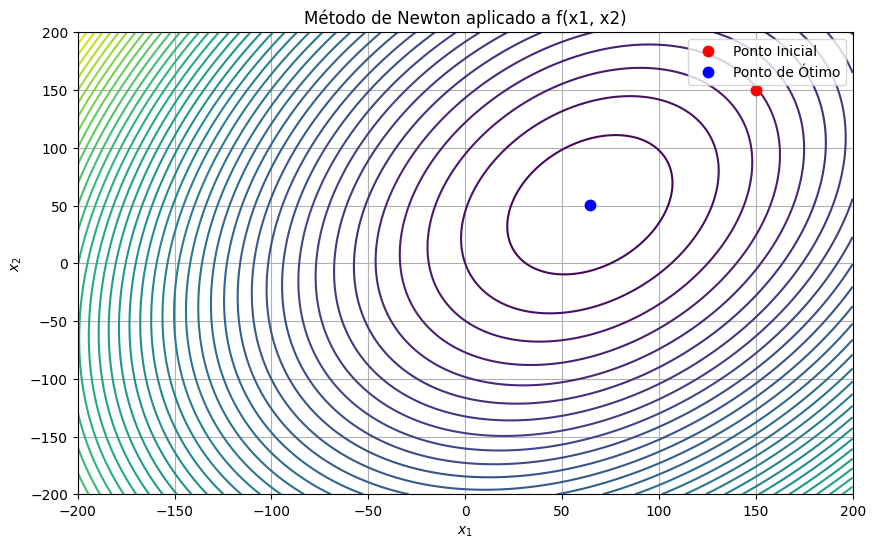

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definição da função objetivo f(x1, x2)
def f(X):
    x1, x2 = X
    return (
        0.6382 * x1**2 +
        0.3191 * x2**2 -
        0.2809 * x1 * x2 -
        67.906 * x1 -
        14.29 * x2
    )

# Gradiente da função objetivo
def grad_f(X):
    x1, x2 = X
    df_dx1 = 2 * 0.6382 * x1 - 0.2809 * x2 - 67.906
    df_dx2 = 2 * 0.3191 * x2 - 0.2809 * x1 - 14.29
    return np.array([df_dx1, df_dx2])

# Hessiana da função objetivo
def hess_f(X):
    return np.array([
        [2 * 0.6382, -0.2809],
        [-0.2809, 2 * 0.3191]
    ])

# Ponto inicial
x0 = np.array([150, 150])

# Aplicar o método de Newton diretamente
H = hess_f(x0)  # Hessiana no ponto inicial
g = grad_f(x0)  # Gradiente no ponto inicial
x_newton = x0 - np.linalg.inv(H).dot(g)  # Atualização de Newton

# Resultado
print("Resultado do Método de Newton:")
print("Ponto ótimo:", x_newton)
print("Valor mínimo de f(x1, x2):", f(x_newton))

# Malha para plotar contorno
x1, x2 = np.meshgrid(np.linspace(-200, 200, 500),
                     np.linspace(-200, 200, 500))
f_mesh = f([x1, x2])

# Plota trajetória
plt.figure(figsize=(10, 6))
plt.contour(x1, x2, f_mesh, levels=50, cmap='viridis')
plt.plot(x0[0], x0[1], '.r', label='Ponto Inicial', markersize=15)
plt.plot(x_newton[0], x_newton[1], '.b', label='Ponto de Ótimo', markersize=15)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Método de Newton aplicado a f(x1, x2)')
plt.legend()
plt.grid()
plt.show()
